In [35]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [36]:
import keras
print(keras.__version__)


2.4.3


In [37]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [38]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [39]:
train_path = 'D:\\Projects_ml\\chest_xray\\chest_xray\\train'
valid_path = 'D:\\Projects_ml\\chest_xray\\chest_xray\\test'

In [40]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [41]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [42]:
# useful for getting number of classes
folders = glob('D:\\Projects_ml\\chest_xray\\chest_xray\\train\\*')

In [43]:
folders

['D:\\Projects_ml\\chest_xray\\chest_xray\\train\\NORMAL',
 'D:\\Projects_ml\\chest_xray\\chest_xray\\train\\PNEUMONIA']

In [44]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [45]:
x

<tf.Tensor 'flatten_1/Identity:0' shape=(None, 25088) dtype=float32>

In [46]:
prediction

<tf.Tensor 'dense_1/Identity:0' shape=(None, 2) dtype=float32>

In [47]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [48]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [49]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=["accuracy"]
)

In [50]:
from keras.preprocessing.image import ImageDataGenerator

In [51]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [52]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
training_set = train_datagen.flow_from_directory('D:\\Projects_ml\\chest_xray\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [54]:
test_set = test_datagen.flow_from_directory('D:\\Projects_ml\\chest_xray\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [55]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 700s 4s/step - loss: 0.1861 - accuracy: 0.9308 - val_loss: 0.2462 - val_accuracy: 0.9087
Epoch 2/5
163/163 [==============================] - 802s 5s/step - loss: 0.1189 - accuracy: 0.9519 - val_loss: 0.3993 - val_accuracy: 0.8926
Epoch 3/5
163/163 [==============================] - 794s 5s/step - loss: 0.1007 - accuracy: 0.9640 - val_loss: 0.2490 - val_accuracy: 0.9151
Epoch 4/5
163/163 [==============================] - 793s 5s/step - loss: 0.0917 - accuracy: 0.9664 - val_loss: 0.2603 - val_accuracy: 0.9103
Epoch 5/5
163/163 [==============================] - 790s 5s/step - loss: 0.0897 - accuracy: 0.9661 - val_loss: 0.2876 - val_accuracy: 0.9183


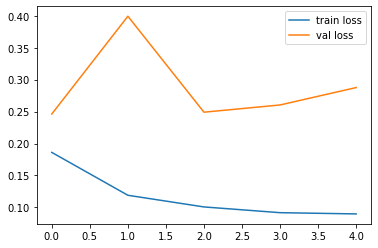

In [65]:
###### loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')
plt.show()

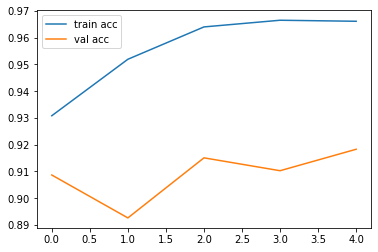

In [64]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')
plt.show()

In [96]:
import tensorflow as tf

from keras.models import load_model
import h5py

model.save("D:\\Projects_ml\\chest_xray\\model_vgg19.h5")
# model.save('model_vgg19.h5')

In [92]:
model.save('model_vgg19.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [93]:
import h5py
f = h5py.File('model_vgg19.h5', 'r')

In [94]:
f

<HDF5 file "model_vgg19.h5" (mode r)>